<a href="https://colab.research.google.com/github/medhanies/hands_on_ml/blob/main/training_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [1]:
import numpy as np

np.random.seed(42) # to make code reproducible
m = 100 # number of instances
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector

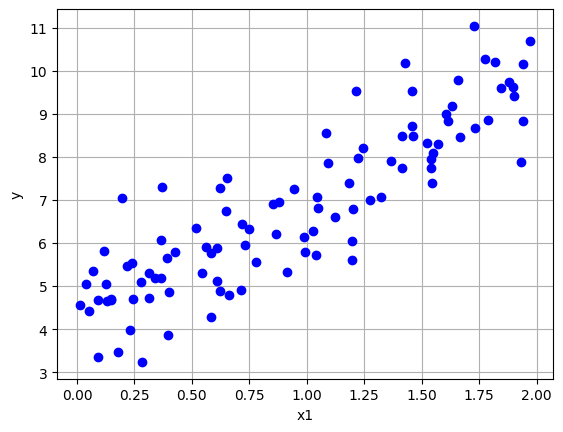

In [15]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'bo')
plt.grid()
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

In [2]:
# compute predicted weights using normal equation
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

In [3]:
# make predictions using predicted weights
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

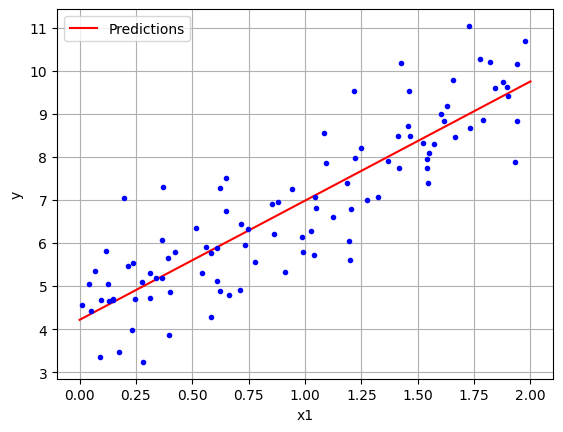

In [27]:
# plot prediction
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.grid()
plt.xlabel("x1")
plt.ylabel("y")
plt.legend()
plt.show()

In [29]:
# Perform lin reg with sklearn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [30]:
# predict
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [31]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

### Batch Gradient Descent

In [4]:
eta = 0.1 # learning rate
n_epochs = 1000
m = len(X_b) # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1) # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [5]:
theta

array([[4.21509616],
       [2.77011339]])

### Stochastic Gradient Descent